# **Plotting code example**
**Softmax Regression**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
x = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
y = [t / 2 for t in x]
x, y

([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0],
 [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0])

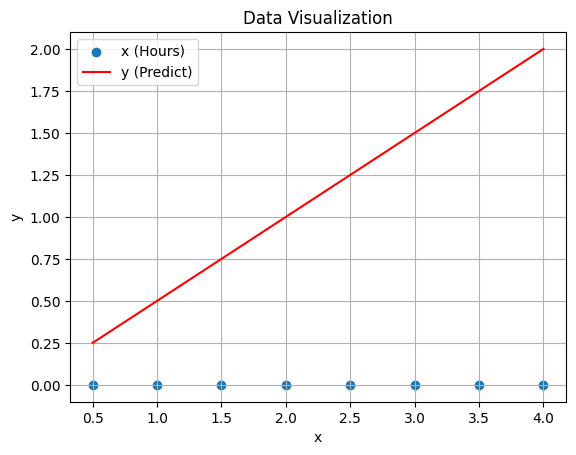

In [3]:
# Plot x as scatter points on y=0
plt.scatter(x, [0] * len(x), label="x (Hours)")
# Plot y as a red line against x
plt.plot(x, y, color="red", label="y (Predict)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data Visualization")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
z = [0, 0, 0, 0, 1, 1, 1, 1]

In [5]:
colors = ["red" if val == 0 else "blue" for val in z]
colors

['red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue']

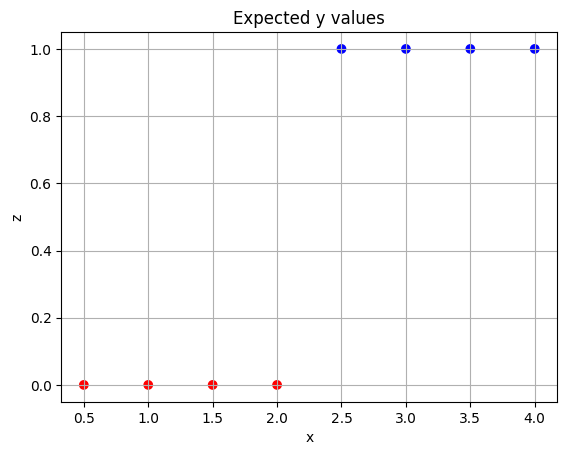

In [6]:
plt.scatter(x, z, c=colors)
plt.xlabel("x")
plt.ylabel("z")
plt.title("Expected y values")
plt.grid(True)
plt.show()

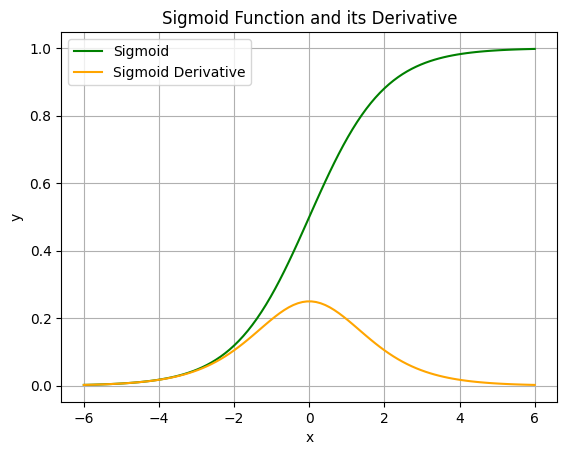

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))


x_values = np.linspace(-6, 6, 100)
y_sigmoid = sigmoid(x_values)
y_derivative = sigmoid_derivative(x_values)

plt.plot(x_values, y_sigmoid, color="green", label="Sigmoid")
plt.plot(x_values, y_derivative, color="orange", label="Sigmoid Derivative")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sigmoid Function and its Derivative")
plt.legend()
plt.grid(True)
plt.show()

## Ý nghĩa Softmax Ổn định (Stable Softmax)

Trong công thức Softmax gốc $\frac{e^Z}{\sum e^Z}$, nếu các giá trị đầu vào $Z$ (logits) quá lớn, khi tính $e^Z$, kết quả có thể vượt quá khả năng lưu trữ của kiểu dữ liệu số thực (float), dẫn đến lỗi **tràn số** (overflow).

Softmax ổn định giải quyết điều này bằng một mẹo toán học đơn giản: **trừ đi giá trị lớn nhất ($C$)** của $Z$ trước khi tính lũy thừa $e$.

$$\text{Softmax}(Z) = \frac{e^{Z-C}}{\sum e^{Z-C}}$$

Về mặt toán học, điều này không làm thay đổi kết quả Softmax, nhưng nó đảm bảo rằng số lớn nhất trong tử số sẽ là $e^{Z_{max} - Z_{max}} = e^0 = 1$, giúp ngăn chặn hiện tượng tràn số.

-----

### Công thức Softmax Ổn định (Phép tính)

```python
return np.exp(z - c) / np.sum(np.exp(z - c), axis=0)
```

Đây là nơi áp dụng công thức Softmax:

1.  **Tử số (`np.exp(z - c)`):**
      * Trừ giá trị lớn nhất (`c`) khỏi ma trận logit (`z`).
      * Tính lũy thừa $e$ cho kết quả. (Bảo vệ khỏi Overflow)
2.  **Mẫu số (`np.sum(..., axis=0)`):**
      * Tính tổng của các giá trị đã được lũy thừa $e$ dọc theo **cột** (`axis=0`). (Bảo vệ khỏi Underflow)
3.  **Phép chia:** Thực hiện phép chia (Broadcasting) để chuẩn hóa, tạo ra xác suất.


## **Softmax One Sample with Z_i too big**

In [16]:
X = np.array(
    [
        [0.5],
        [1.0],
        [1.5],
        [2.0],
        [2.5],
        [3.0],
        [3.5],
        [4.0],
    ]
)
Y = np.array([0, 0, 1, 0, 0, 1, 1, 1])
X, Y

(array([[0.5],
        [1. ],
        [1.5],
        [2. ],
        [2.5],
        [3. ],
        [3.5],
        [4. ]]),
 array([0, 0, 1, 0, 0, 1, 1, 1]))

In [17]:
def convert_one_hot(y, k):  # k class, y label
    one_hot = np.zeros((len(y), k))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot


n_classes = 2
Y_onehot = convert_one_hot(Y, n_classes)

In [18]:
X_b = np.hstack([np.ones((X.shape[0], 1)), X])
X_b, Y_onehot

(array([[1. , 0.5],
        [1. , 1. ],
        [1. , 1.5],
        [1. , 2. ],
        [1. , 2.5],
        [1. , 3. ],
        [1. , 3.5],
        [1. , 4. ]]),
 array([[1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.]]))

In [23]:
x = X_b[0].reshape((2, 1))
y = Y_onehot[0].reshape((2, 1))
print("\n", x)
print("\n", y)
theta = np.array([[0.1, 0.2], [0.3, 0.4]])
print("\n", theta)


 [[1. ]
 [0.5]]

 [[1.]
 [0.]]

 [[0.1 0.2]
 [0.3 0.4]]


In [ ]:
def simple_softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

In [ ]:
def softmax_stable(z):
    # Cần tìm max trên mỗi HÀNG (mỗi mẫu)
    # `np.max(z, axis=0, keepdims=True)`: Tính giá trị lớn nhất trên mỗi cột (`axis=0`)
    c = np.max(z, axis=1, keepdims=True)

    # Tính lũy thừa của z đã trừ c
    exp_z = np.exp(z - c)

    # Chuẩn hóa (tổng trên mỗi HÀNG)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [ ]:
z = np.array([[[1, 2, 3], [4, 5, 6], [7, 8, 9]], [[2, 2, 3], [4, 5, 6], [8, 8, 9]]])
print(np.max(z, axis=2))

In [ ]:
def predict_softmax_stable(x, theta):
    z = x.T.dot(theta)
    # y_hat = softmax(z)
    y_hat = softmax_stable(z)
    return z, y_hat


z, y_hat = predict_softmax_stable(x, theta)
print(f"z:\n{z}")
print(f"y_hat:\n{y_hat}")

In [ ]:
def predict_softmax(x, theta):
    z = theta.T.dot(x)
    y_hat = simple_softmax(z)
    return z, y_hat


z, y_hat = predict_softmax(x, theta)
z, y_hat

## **Cross Entropy Loss**
ƯU ĐIỂM CỦA CROSS-ENTROPY SO VỚI MSE TRONG CLASSIFICATION:
- CE đo khoảng cách giữa hai phân phối
- MSE đo khoảng cách điểm, không capture được "distribution distance"


In [25]:
def cross_entropy(y, y_hat):
    return -np.sum(y * np.log(y_hat + 1e-8))  # epsilon to advoid log(0)


def mse(y, y_hat):
    return np.sum((y - y_hat) ** 2)

In [26]:
scenarios = [
    {"y": np.array([0.5, 0.5]), "label": "y = [0.5, 0.5]"},
    {"y": np.array([0.1, 0.9]), "label": "y = [0.1, 0.9]"},
    {"y": np.array([0.8, 0.2]), "label": "y = [0.8, 0.2]"},
]

### Penalty mạnh hơn khi dự đoán sai:
   - CE: loss → ∞ khi confidence sai cao (ŷ → 0 khi y = 1)
   - MSE: penalty bị chặn, không đủ mạnh để "phạt" dự đoán sai
Đây là một nhận định rất chính xác khi so sánh hai hàm mất mát (Loss Function) phổ biến trong phân loại: **Cross-Entropy (CE)** và **Mean Squared Error (MSE)**.
---

=> ℹ️ Ý nghĩa Đơn giản: Khả năng "Phạt" Sự Sai Lệch

Khi huấn luyện mô hình, hàm mất mát đo lường **mức độ tệ** của dự đoán so với kết quả thực tế. Mức độ tệ này chính là "hình phạt" mà mô hình nhận được.

#### 1. Cross-Entropy (CE) Loss: Hình phạt Mạnh Mẽ (Loss $\to \infty$)

##### Tình huống: **Dự đoán Sai một cách Tự tin (Overconfident, Wrong)**

Giả sử bạn đang dự đoán một bức ảnh:
* **Kết quả Thực tế ($y$):** Bức ảnh **là** chó ($y=1$).
* **Dự đoán Mô hình ($\hat{y}$):** Mô hình nói bức ảnh **là mèo** với xác suất cao ($**\hat{y} \to 0**$).

**Giải thích:**

1.  **Công thức Logarit:** CE Loss sử dụng hàm logarit tự nhiên ($\log$).
2.  **Mức phạt:** Khi mô hình dự đoán xác suất ($\hat{y}$) rất gần **0** (tức là khẳng định chắc chắn đó là mèo) trong khi kết quả đúng là **1** (chó), thì hàm $-\log(\hat{y})$ sẽ được tính.
3.  **Kết quả:** Khi $\hat{y}$ tiến về 0, giá trị $\log(\hat{y})$ tiến về $-\infty$, do đó, $-\log(\hat{y})$ tiến về **$+\infty$** (vô cùng).

> **Kết luận:** Cross-Entropy trừng phạt mô hình **rất nghiêm khắc** khi nó đưa ra một dự đoán sai với độ tin cậy (confidence) cao. Hình phạt này về mặt lý thuyết là **không giới hạn** ($\infty$).



#### 2. Mean Squared Error (MSE) Loss: Hình phạt Bị Chặn (Penalty is Bounded)

##### Tình huống: **Dự đoán Sai một cách Tự tin (Overconfident, Wrong)**

Giả sử cùng tình huống trên:
* **Kết quả Thực tế ($y$):** $y=1$.
* **Dự đoán Mô hình ($\hat{y}$):** Mô hình nói $\hat{y}$ gần $0$ (ví dụ: $\hat{y}=0.01$).

**Công thức MSE:** $\text{MSE} = (y - \hat{y})^2$

**Giải thích:**

1.  **Mức phạt:** Giá trị lớn nhất mà MSE có thể đạt được là khi dự đoán $0$ cho nhãn $1$ (hoặc ngược lại).
2.  **Tính toán:** $\text{MSE}_{max} = (1 - 0)^2 = 1$.
3.  **Kết quả:** Dù mô hình dự đoán **sai lầm khủng khiếp** đến mức nào ($\hat{y}=0$), hình phạt tối đa mà nó nhận được cũng chỉ là $1$.

> **Kết luận:** Hình phạt của MSE bị **giới hạn** (bị chặn) bởi 1. Điều này có nghĩa là, một khi mô hình đã dự đoán sai khá nhiều, việc nó dự đoán sai thêm một chút (ví dụ, từ $\hat{y}=0.2$ xuống $\hat{y}=0.1$) sẽ không tạo ra một sự thúc đẩy mạnh mẽ để sửa lỗi như CE Loss.

#### Tóm tắt Khác biệt

| Đặc điểm | Cross-Entropy (CE) | Mean Squared Error (MSE) |
| :--- | :--- | :--- |
| **Hình phạt khi sai** | Rất mạnh, tiến tới $\infty$ | Bị chặn, tối đa là $1$ |
| **Tác dụng** | Buộc mô hình phải **rất chắc chắn** về dự đoán đúng và **rất sợ hãi** việc dự đoán sai. | Phản ứng yếu hơn với sự sai lệch cực đoan. |
| **Sử dụng trong** | Phân loại (Classification) | Hồi quy (Regression) |

Chính vì khả năng trừng phạt mạnh mẽ, CE Loss là lựa chọn tiêu chuẩn và gần như bắt buộc cho các bài toán phân loại.

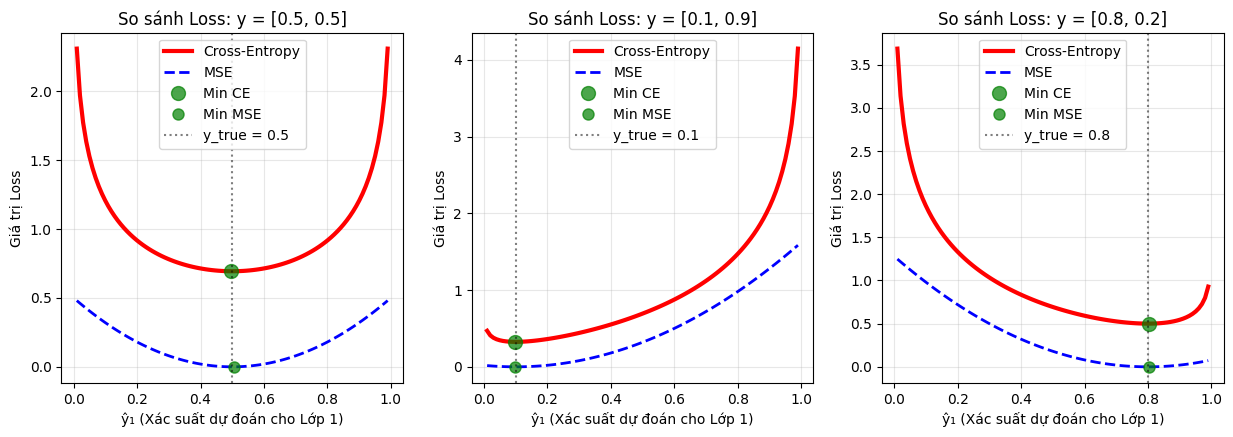

In [ ]:
# Yêu cầu phải có các hàm cross_entropy() và mse() đã được định nghĩa trước
# (Lưu ý: Hai hàm này cần được định nghĩa ở các ô code trước đó để code này chạy được)

# Thiết lập kích thước đồ thị tổng thể để dễ quan sát
plt.figure(figsize=(15, 10))

# Vòng lặp này sẽ chạy qua từng kịch bản (scenario) so sánh (ví dụ: y_true = [1, 0], y_true = [0.5, 0.5])
for idx, scenario in enumerate(scenarios):
    # Lấy nhãn thực tế (ground truth) của kịch bản hiện tại
    # Ví dụ: y_true = [1, 0] nghĩa là Lớp 0 là đúng
    y_true = scenario["y"]

    # --- CHUẨN BỊ DỮ LIỆU ĐỂ VẼ ĐỒ THỊ ---

    # Tạo 100 điểm dữ liệu dự đoán cho xác suất của Lớp 1 (ŷ₁).
    # Ta chỉ xét từ 0.01 đến 0.99 để tránh lỗi log(0) trong Cross-Entropy.
    y_hat_1_values = np.linspace(0.01, 0.99, 100)
    ce_values = []
    mse_values = []

    # Bắt đầu lặp qua 100 điểm dự đoán ŷ₁
    for y_hat_1 in y_hat_1_values:
        # Trong bài toán nhị phân (2 lớp), nếu ŷ₁ là xác suất Lớp 1,
        # thì xác suất Lớp 0 (ŷ₀) là 1 - ŷ₁.
        # y_hat là vector xác suất dự đoán (ví dụ: [0.3, 0.7])
        y_hat = np.array([y_hat_1, 1 - y_hat_1])

        # Tính toán giá trị Cross-Entropy Loss cho cặp (y_true, y_hat)
        ce_values.append(cross_entropy(y_true, y_hat))

        # Tính toán giá trị Mean Squared Error Loss cho cặp (y_true, y_hat)
        mse_values.append(mse(y_true, y_hat))

    # --- VẼ ĐỒ THỊ VÀ CHÚ THÍCH ---

    # Tạo một subplot (đồ thị con) cho mỗi kịch bản
    # Cấu trúc: 2 hàng, 3 cột, vị trí hiện tại là idx + 1
    plt.subplot(2, 3, idx + 1)

    # Vẽ đường Cross-Entropy (màu đỏ, nét dày)
    plt.plot(y_hat_1_values, ce_values, "r-", linewidth=3, label="Cross-Entropy")

    # Vẽ đường MSE (màu xanh, nét đứt)
    plt.plot(y_hat_1_values, mse_values, "b--", linewidth=2, label="MSE")

    # --- ĐÁNH DẤU ĐIỂM TỐI THIỂU (MINIMUM) ---

    # Tìm chỉ số (index) của giá trị Loss nhỏ nhất (minimum) trên đường CE
    min_ce_idx = np.argmin(ce_values)
    # Tìm chỉ số (index) của giá trị Loss nhỏ nhất (minimum) trên đường MSE
    min_mse_idx = np.argmin(mse_values)

    # Đánh dấu điểm Min Loss của CE bằng chấm tròn màu xanh lá cây
    # Điểm này luôn phải ở tại vị trí y_true (xem đường kẻ dọc)
    plt.plot(
        y_hat_1_values[min_ce_idx],
        ce_values[min_ce_idx],
        "go",
        markersize=10,
        label="Min CE",
        alpha=0.7,
    )

    # Đánh dấu điểm Min Loss của MSE bằng chấm tròn màu xanh lá cây
    plt.plot(
        y_hat_1_values[min_mse_idx],
        mse_values[min_mse_idx],
        "go",
        markersize=8,
        label="Min MSE",
        alpha=0.7,
    )

    # --- ĐƯỜNG KẺ THẲNG (ĐIỂM ĐÚNG) ---

    # Vẽ một đường thẳng đứng tại vị trí của xác suất thực tế (y_true[0])
    # Đây là điểm mà cả hai hàm Loss đều đạt giá trị tối thiểu (min loss = 0)
    plt.axvline(
        x=y_true[0],
        color="black",
        linestyle=":",
        alpha=0.5,
        label=f"y_true = {y_true[0]}",
    )

    # --- THIẾT LẬP NHÃN VÀ TIÊU ĐỀ ---
    plt.xlabel("ŷ₁ (Xác suất dự đoán cho Lớp 1)")
    plt.ylabel("Giá trị Loss")
    plt.title(f'So sánh Loss: {scenario["label"]}')
    plt.legend()
    plt.grid(True, alpha=0.3)  # Bật lưới (grid) mờ để dễ theo dõi

## Tối ưu nhanh hơn:
   - Gradient lớn khi sai nhiều → convergence nhanh
   - Gradient nhỏ khi gần optimum → stability
  ---

### 1. Gradient Lớn khi Sai Nhiều (Convergence Nhanh)

**Tối ưu nhanh hơn (Faster Optimization)**

#### Giải thích:

1.  **Gradient là gì?** Gradient là "độ dốc" của hàm mất mát. Trong huấn luyện, Gradient cho biết mô hình cần phải điều chỉnh các tham số (trọng số) theo hướng nào và với **tốc độ** bao nhiêu để giảm mất mát.
2.  **Tình huống:** Khi mô hình dự đoán **sai rất nhiều** (tức là giá trị mất mát $L$ đang rất cao), CE Loss tạo ra một Gradient có **độ lớn rất lớn**.
3.  **Hành động:** Vì Gradient lớn, các thuật toán tối ưu hóa (như Gradient Descent) sẽ điều chỉnh trọng số của mô hình một cách **mạnh mẽ và nhanh chóng** trong những bước đầu.
4.  **Hiệu quả:** Điều này giúp mô hình thoát khỏi trạng thái dự đoán tồi tệ ban đầu một cách nhanh chóng, làm cho quá trình **hội tụ (convergence)** diễn ra nhanh hơn.

> **Tóm lại:** CE Loss cung cấp một "cú hích" mạnh mẽ ngay từ đầu để đẩy mô hình đi đúng hướng khi nó đang lạc lối.

---

### 2. Gradient Nhỏ khi Gần Optimum (Stability)

**Ổn định gần điểm tối ưu (Stability near Optimum)**

#### Giải thích:

1.  **Tình huống:** Khi mô hình đã học được khá nhiều và đang dự đoán **gần đúng** (tức là giá trị mất mát $L$ đã rất nhỏ, và mô hình đang ở gần điểm tối ưu - optimum), Gradient sẽ có **độ lớn nhỏ**.
2.  **Hành động:** Sự điều chỉnh trọng số của mô hình trở nên **nhỏ và từ tốn** hơn.
3.  **Hiệu quả:** Điều này ngăn chặn mô hình "nhảy qua" hoặc "dao động" xung quanh điểm tối ưu. Nó cho phép mô hình điều chỉnh tinh tế các trọng số để tìm kiếm điểm thấp nhất một cách ổn định mà không bị mất kiểm soát.

> **Tóm lại:** CE Loss giúp mô hình di chuyển nhanh khi còn xa đích và sau đó **giảm tốc độ** để đảm bảo sự ổn định và chính xác khi tiếp cận đích đến.



#### So sánh với MSE (Liên quan)

Gradient của MSE không có tính chất này. Gradient của MSE là tuyến tính theo sai số $(\hat{y} - y)$, và nó thường giữ nguyên độ lớn ngay cả khi gần optimum, khiến mô hình dễ bị **dao động** và khó đạt được sự hội tụ ổn định như CE Loss.

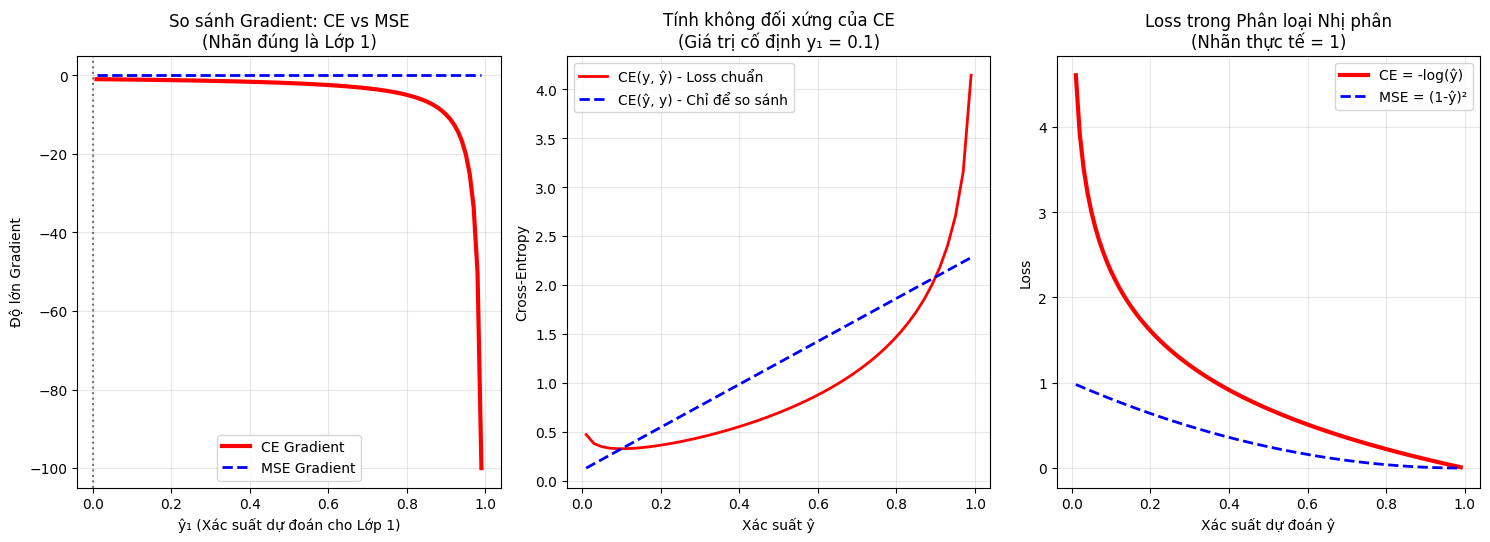

In [ ]:
# Thiết lập kích thước đồ thị tổng thể, tiếp nối từ các subplot trước đó
plt.figure(figsize=(15, 10))

# --- SO SÁNH ĐỘ DỐC (GRADIENTS) ---
# Mục tiêu: Xem phản ứng của Gradient (tốc độ học) khi dự đoán sai lệch
plt.subplot(2, 3, 4)

# Nhãn thực tế cố định: Lớp 1 là đúng (y = [0, 1])
y_true_fixed = np.array([0.0, 1.0])
# Các giá trị dự đoán ŷ₁ (xác suất Lớp 1) chạy từ 0.01 đến 0.99
y_hat_1_values = np.linspace(0.01, 0.99, 100)

ce_gradients = []
mse_gradients = []

for y_hat_1 in y_hat_1_values:
    # Vector xác suất dự đoán: [P(Lớp 0), P(Lớp 1)]
    y_hat = np.array([y_hat_1, 1 - y_hat_1])

    # 1. Tính Gradient cho Cross-Entropy (áp dụng quy tắc chuỗi với Softmax)
    # Công thức đơn giản: dL/dŷ = ŷ - y (chúng ta đang tính dL/dŷ)
    # Trong code này, ta dùng công thức dL/dŷ (không phải dL/dz)
    # dL/dŷ = -y/ŷ (với lớp y=1)
    # Cộng thêm 1e-8 để tránh lỗi chia cho 0 khi ŷ rất nhỏ
    ce_grad = -y_true_fixed[0] / (y_hat[0] + 1e-8) - y_true_fixed[1] / (y_hat[1] + 1e-8)
    ce_gradients.append(ce_grad)

    # 2. Tính Gradient cho Mean Squared Error (MSE)
    # Công thức: dL/dŷ = 2 * (ŷ - y)
    mse_grad = 2 * (y_hat - y_true_fixed)

    # Tính tổng gradient (vì ta đang vẽ 1 đường, thường tổng các gradient được dùng)
    mse_grad_total = np.sum(mse_grad)
    mse_gradients.append(mse_grad_total)

# Vẽ đồ thị CE Gradient (màu đỏ)
# Quan sát: Khi ŷ₁ (xác suất Lớp 1) xa điểm đúng (1.0), gradient rất lớn.
plt.plot(y_hat_1_values, ce_gradients, "r-", linewidth=3, label="CE Gradient")
# Vẽ đồ thị MSE Gradient (màu xanh)
# Quan sát: Gradient của MSE luôn là một đường thẳng (tuyến tính), không có cú hích mạnh khi sai.
plt.plot(y_hat_1_values, mse_gradients, "b--", linewidth=2, label="MSE Gradient")

# Đường kẻ dọc tại vị trí đúng (ŷ₁ = 1.0, tương đương y_true_fixed[0] = 0)
plt.axvline(x=y_true_fixed[0], color="black", linestyle=":", alpha=0.5)

plt.xlabel("ŷ₁ (Xác suất dự đoán cho Lớp 1)")
plt.ylabel("Độ lớn Gradient")
plt.title("So sánh Gradient: CE vs MSE\n(Nhãn đúng là Lớp 1)")
plt.legend()
plt.grid(True, alpha=0.3)

# --- MINH HỌA TÍNH KHÔNG ĐỐI XỨNG CỦA CE ---
# Mục tiêu: Cho thấy CE(y, ŷ) khác CE(ŷ, y). CE không phải là khoảng cách đối xứng.
plt.subplot(2, 3, 5)

y1 = 0.1  # Xác suất cố định của lớp 1 trong vector thứ nhất
y2 = 0.9
y_hat_values = np.linspace(0.01, 0.99, 50)  # Xác suất cho lớp 1 trong vector thứ hai

# Tính CE(y, ŷ): y là nhãn thực, ŷ là dự đoán. Đây là cách tính LOSS chuẩn.
# y = [0.1, 0.9] (cố định), ŷ = [y_hat, 1-y_hat] (thay đổi)
ce_y_y_hat = [
    cross_entropy(np.array([y1, 1 - y1]), np.array([y_hat, 1 - y_hat]))
    for y_hat in y_hat_values
]

# Tính CE(ŷ, y): Đảo ngược vai trò. ŷ là nhãn thực, y là dự đoán. KHÔNG CÓ Ý NGHĨA LOSS.
# ŷ = [y_hat, 1-y_hat] (thay đổi), y = [0.1, 0.9] (cố định)
ce_y_hat_y = [
    cross_entropy(np.array([y_hat, 1 - y_hat]), np.array([y1, 1 - y1]))
    for y_hat in y_hat_values
]

# Đồ thị cho thấy hai đường Loss này KHÔNG đối xứng nhau qua trục (không bằng nhau)
plt.plot(y_hat_values, ce_y_y_hat, "r-", linewidth=2, label="CE(y, ŷ) - Loss chuẩn")
plt.plot(
    y_hat_values, ce_y_hat_y, "b--", linewidth=2, label="CE(ŷ, y) - Chỉ để so sánh"
)
plt.xlabel("Xác suất ŷ")
plt.ylabel("Cross-Entropy")
plt.title("Tính không đối xứng của CE\n(Giá trị cố định y₁ = 0.1)")
plt.legend()
plt.grid(True, alpha=0.3)

# --- ỨNG DỤNG TRONG LOGISTIC REGRESSION (Phân loại nhị phân) ---
# Mục tiêu: So sánh Loss khi y_true = 1.
plt.subplot(2, 3, 6)

y_true_binary = 1  # Nhãn thực tế là 1
y_pred_probs = np.linspace(0.01, 0.99, 100)  # Xác suất dự đoán ŷ

# CE Loss trong trường hợp nhị phân (khi y_true = 1)
# Công thức rút gọn: CE = -log(ŷ)
ce_binary = -np.log(y_pred_probs)

# MSE Loss trong trường hợp nhị phân (khi y_true = 1)
# Công thức rút gọn: MSE = (1 - ŷ)²
mse_binary = (1 - y_pred_probs) ** 2

# Đồ thị CE (màu đỏ) cho thấy:
# - Khi ŷ -> 1 (đúng), Loss -> 0
# - Khi ŷ -> 0 (sai), Loss -> vô cùng (hình phạt mạnh)
plt.plot(y_pred_probs, ce_binary, "r-", linewidth=3, label="CE = -log(ŷ)")

# Đồ thị MSE (màu xanh) cho thấy:
# - Hình phạt bị chặn, tối đa là 1.
plt.plot(y_pred_probs, mse_binary, "b--", linewidth=2, label="MSE = (1-ŷ)²")

plt.xlabel("Xác suất dự đoán ŷ")
plt.ylabel("Loss")
plt.title("Loss trong Phân loại Nhị phân\n(Nhãn thực tế = 1)")
plt.legend()
plt.grid(True, alpha=0.3)

# Đảm bảo các đồ thị không chồng chéo nhau
plt.tight_layout()
# Hiển thị tất cả các đồ thị con
plt.show()

## GRADIENT HIỆU QUẢ HƠN:
   - CE + Softmax: gradient đơn giản ∇L = ŷ - y
   - MSE + Softmax: gradient phức tạp, dễ gây vanishing/exploding

Nó liên quan đến sự đơn giản và hiệu quả của Gradient (Đạo hàm) trong quá trình lan truyền ngược (Backpropagation).

---

### 1. Kết hợp Hiệu quả: CE Loss + Softmax

#### Gradient Đơn giản: $\nabla L = \hat{y} - y$

* **Tình huống:** Khi bạn sử dụng **Softmax** làm lớp đầu ra và **Cross-Entropy Loss** làm hàm mất mát.
* **Giải thích:** Khi tính đạo hàm của hàm mất mát ($L$) theo các logit (output trước khi qua Softmax), kết quả đạo hàm cuối cùng đơn giản đến mức đáng kinh ngạc:
    $$\nabla L = \text{Gradient} = \text{Dự đoán} - \text{Thực tế}$$
    $$\nabla L = \hat{y} - y$$

* **Ý nghĩa:**
    1.  **Tính toán Cực kỳ Nhanh:** Việc tính toán Gradient chỉ là một phép trừ ma trận đơn giản giữa vector xác suất đầu ra ($\hat{y}$) và vector One-Hot Encoding thực tế ($y$). Điều này tăng tốc độ huấn luyện đáng kể.
    2.  **Trực quan:** Độ lớn của Gradient tỷ lệ trực tiếp với sự khác biệt giữa dự đoán và thực tế. Ví dụ, nếu $\hat{y} = [0.9, 0.1]$ và $y = [0, 1]$, Gradient sẽ là $[-0.9, 0.9]$, chỉ ra rằng mô hình cần phải điều chỉnh mạnh để giảm xác suất ở lớp 0 và tăng ở lớp 1.

---

### 2. Kết hợp Kém Hiệu quả: MSE Loss + Softmax

#### Gradient Phức tạp: Dễ gây Vanishing/Exploding Gradient

* **Tình huống:** Khi bạn sử dụng **Softmax** làm lớp đầu ra nhưng lại chọn **Mean Squared Error (MSE) Loss** làm hàm mất mát.
* **Giải thích:**
    1.  **Quy tắc Chuỗi (Chain Rule):** Khi tính Gradient, bạn phải áp dụng quy tắc chuỗi qua cả hai hàm:
        $$\nabla L_{\text{MSE}} = \frac{\partial \text{MSE}}{\partial \text{Softmax}} \times \frac{\partial \text{Softmax}}{\partial \text{Logit}}$$
    2.  **Đạo hàm Softmax Phức tạp:** Đạo hàm của hàm Softmax đối với logit là một phép tính phức tạp hơn, liên quan đến tích và hiệu của các xác suất.
    3.  **Tác động của Gradient:**
        * Các thuật ngữ trong Gradient trở nên phức tạp và thường bao gồm các xác suất $\hat{y}_i$.
        * Khi $\hat{y}_i$ tiến gần đến 0 hoặc 1 (tức là mô hình dự đoán tự tin), Gradient có xu hướng trở nên **rất nhỏ (Vanishing Gradient)**.
        * Khi Gradient quá nhỏ, quá trình học bị chậm lại hoặc dừng hẳn, khiến mô hình không thể tiếp tục tối ưu hóa hiệu quả.

> **Tóm lại:** MSE làm phá vỡ sự đơn giản của Gradient mà Softmax mang lại. Việc tính toán trở nên phức tạp, chậm hơn và dễ dẫn đến các vấn đề không ổn định trong quá trình lan truyền ngược như **Vanishing Gradient** (Gradient biến mất), làm quá trình huấn luyện thất bại.

---

#### Tổng kết

| Combination | Gradient Formula | Tốc độ & Độ ổn định | Ứng dụng |
| :--- | :--- | :--- | :--- |
| **Softmax + CE Loss** | $\nabla L = \hat{y} - y$ | **Nhanh, ổn định, hiệu quả cao.** | Tiêu chuẩn cho Phân loại Đa lớp. |
| **Softmax + MSE Loss** | Phức tạp | **Chậm, dễ bị Vanishing Gradient.** | Hầu như không được sử dụng trong Phân loại. |

In [ ]:
# ỨNG DỤNG TRONG SOFTMAX REGRESSION
import numpy as np
# Giả sử hàm cross_entropy và mse đã được định nghĩa
# Ví dụ: def cross_entropy(y, y_hat): return -np.sum(y * np.log(y_hat))


# --- HÀM SOFTMAX ỔN ĐỊNH ---
def softmax(z):
    # Trừ đi giá trị MAX của z để tránh hiện tượng tràn số (overflow) khi tính np.exp()
    # np.max(z) hoạt động trên toàn bộ vector z (vì không có axis)
    exp_z = np.exp(z - np.max(z))

    # Chuẩn hóa: Chia từng giá trị đã lũy thừa e cho tổng của chúng
    # Kết quả là vector xác suất có tổng bằng 1.
    return exp_z / np.sum(exp_z)


# --- THIẾT LẬP THAM SỐ (TRỌNG SỐ VÀ BIAS) ---
# Ví dụ: Bài toán phân loại 3 lớp (3-class classification) và 2 tính năng (features)

W = np.array(
    [
        [2.0, 1.0],  # Trọng số (Weights) của Lớp 0
        [1.0, 2.0],  # Trọng số của Lớp 1
        [0.5, 1.5],
    ]
)  # Trọng số của Lớp 2
# W có kích thước 3x2 (Lớp x Tính năng)

b = np.array([0.1, -0.1, 0.2])  # Bias cho 3 lớp (1x3)

# --- DỮ LIỆU ĐẦU VÀO VÀ NHÃN THỰC TẾ ---
x = np.array([1.0, -1.0])  # Dữ liệu đầu vào (Input features) có 2 tính năng

# Nhãn thực tế (True label): Lớp 1 là đúng
# Được mã hóa dưới dạng One-Hot Encoding: [P(L0), P(L1), P(L2)]
y_true = np.array([0, 1, 0])

# --- FORWARD PASS (LAN TRUYỀN TIẾN) ---

# Bước 1: Tính Logits (z)
# z = W * x + b
# Phép nhân ma trận @ (dot product): (3x2) @ (2x1) = (3x1)
# z là vector các điểm số thô trước khi qua hàm Softmax
z = W @ x + b
# z có 3 giá trị, tương ứng với điểm số của 3 lớp

# Bước 2: Tính Xác suất Dự đoán (ŷ)
# Chuyển đổi Logits (z) thành xác suất (ŷ) bằng hàm Softmax
y_hat = softmax(z)  # Predicted probabilities

print(f"Input x (Tính năng): {x}")
print(f"Logits z (Điểm số thô): {z}")
print(f"Predicted probabilities ŷ (Xác suất dự đoán): {y_hat}")
print(f"True distribution y (Nhãn One-Hot): {y_true}")

# --- TÍNH TOÁN LOSS (MỨC ĐỘ SAI LỆCH) ---

# Tính Cross-Entropy Loss (chuẩn cho phân loại)
# CE sẽ trừng phạt mạnh nếu xác suất ở vị trí đúng (Lớp 1) nhỏ.
ce_loss = cross_entropy(y_true, y_hat)

# Tính MSE Loss (chỉ để so sánh, ít dùng cho phân loại)
mse_loss = mse(y_true, y_hat)

print(f"\nCross-Entropy Loss: {ce_loss:.6f}")
print(f"MSE Loss: {mse_loss:.6f}")

Input x (Tính năng): [ 1. -1.]
Logits z (Điểm số thô): [ 1.1 -1.1 -0.8]
Predicted probabilities ŷ (Xác suất dự đoán): [0.79341669 0.08791307 0.11867024]
True distribution y (Nhãn One-Hot): [0 1 0]

Cross-Entropy Loss: 2.431407
MSE Loss: 1.475495


In [ ]:
# GRADIENT COMPARISON CHO OPTIMIZATION
def analyze_gradients():
    # Giả định y_hat (dự đoán) và y_true (thực tế) từ Softmax Regression đã có
    # Ví dụ: y_hat = [0.1, 0.8, 0.1], y_true = [0, 1, 0]

    # --- 1. TÍNH GRADIENT CỦA CROSS-ENTROPY + SOFTMAX ---

    # Với Cross-Entropy + Softmax, Gradient rất đơn giản: ∂L/∂z = ŷ - y
    # LƯU Ý: Đây là Gradient của Loss theo Logit (∂L/∂z),
    # là thứ được sử dụng để điều chỉnh Trọng số (Weights)
    gradient_ce = y_hat - y_true
    print(f"CE Gradient (ŷ - y): {gradient_ce}")
    print(
        "→ Ý nghĩa: Độ dốc (Gradient) chỉ là hiệu số trực tiếp giữa xác suất dự đoán và nhãn thực tế."
    )
    print("→ Ưu điểm: Cực kỳ đơn giản, tính toán nhanh và ổn định.")

    # --- 2. TÍNH GRADIENT CỦA MSE + SOFTMAX (MINH HỌA SỰ PHỨC TẠP) ---

    # Công thức toán học cho Gradient của MSE Loss theo Logit (∂L/∂z)
    # Rất phức tạp và cồng kềnh, liên quan đến tích của các xác suất.
    # ∂L/∂z_j = 2 * Σ_i [ (ŷ_i - y_i) * ŷ_i * (1_{i=j} - ŷ_j) ]
    gradient_mse = np.zeros_like(z)

    # Vòng lặp phức tạp để minh họa cách tính toán của MSE Gradient
    for j in range(len(z)):  # Lớp j (lớp đang tính đạo hàm theo logit z_j)
        for i in range(len(z)):  # Lớp i (lớp đang được tổng hợp)
            # Từng thành phần trong tổng phức tạp của MSE Gradient
            gradient_mse[j] += (
                2 * (y_hat[i] - y_true[i]) * y_hat[i] * ((i == j) - y_hat[j])
            )

    print(f"\nMSE Gradient (Công thức phức tạp): {gradient_mse}")
    print(
        "→ Nhược điểm: Tính toán phức tạp, dễ dẫn đến lỗi số học (Vanishing Gradient) khi ŷ gần 0 hoặc 1."
    )


# Chạy hàm phân tích Gradient
analyze_gradients()

CE Gradient (ŷ - y): [ 0.79341669 -0.91208693  0.11867024]
→ Ý nghĩa: Độ dốc (Gradient) chỉ là hiệu số trực tiếp giữa xác suất dự đoán và nhãn thực tế.
→ Ưu điểm: Cực kỳ đơn giản, tính toán nhanh và ổn định.

MSE Gradient (Công thức phức tạp): [ 0.36498499 -0.25943064 -0.10555434]
→ Nhược điểm: Tính toán phức tạp, dễ dẫn đến lỗi số học (Vanishing Gradient) khi ŷ gần 0 hoặc 1.


## **Boundary tạo bởi Softmax Regression là?**

In [90]:
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

### Training

In [92]:
# Yêu cầu nhập hàm make_blobs từ thư viện sklearn.datasets
# from sklearn.datasets import make_blobs

# Tạo dữ liệu giả lập (X, y) với các cụm riêng biệt
X, y = make_blobs(
    n_samples=300,  # Tổng số điểm dữ liệu (mẫu) được tạo ra. Ở đây là 300 điểm.
    centers=3,  # Số lượng trung tâm cụm (clusters) cần tạo. Ta muốn phân loại 3 lớp.
    n_features=2,  # Số lượng tính năng (features) cho mỗi điểm (ví dụ: Tọa độ x và y).
    cluster_std=1.2,  # Độ lệch chuẩn của các cụm. Giá trị càng lớn, các cụm càng "rộng" và chồng chéo lên nhau nhiều hơn.
    random_state=42,  # Thiết lập seed để đảm bảo kết quả tạo dữ liệu là như nhau mỗi lần chạy (tính tái lặp).
)

# Kết quả:
# X: Ma trận chứa 300 điểm dữ liệu, mỗi điểm có 2 tính năng (300, 2)
# y: Vector chứa nhãn cụm (0, 1, hoặc 2) cho 300 điểm (300,)

In [93]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

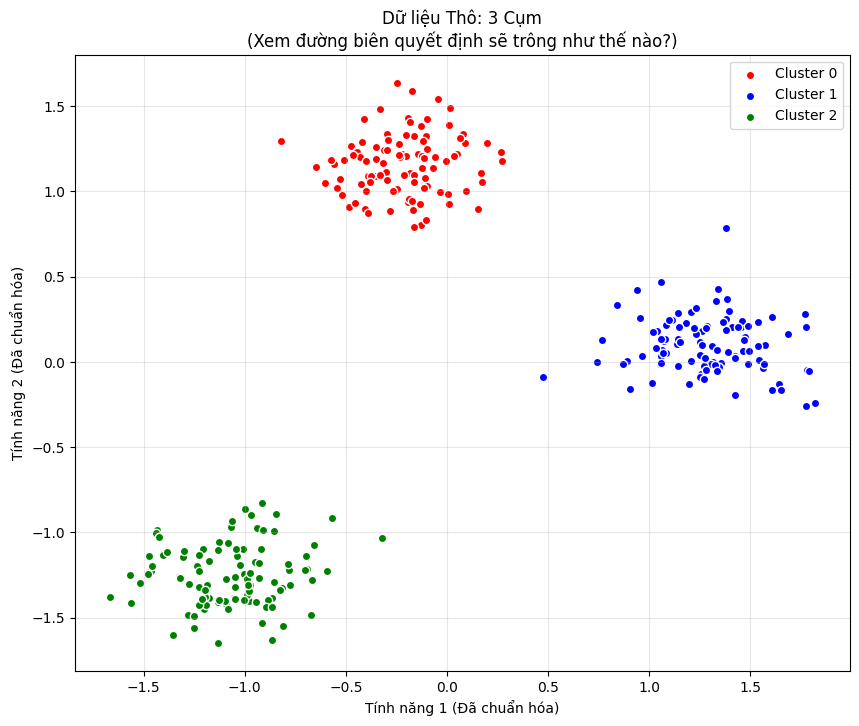

In [94]:
# Yêu cầu nhập thư viện matplotlib.pyplot (đã được làm gọn thành plt)
# Giả định X_scaled và y đã được định nghĩa từ bước tạo và chuẩn hóa dữ liệu

# Thiết lập kích thước của cửa sổ đồ thị (width=10 inches, height=8 inches)
plt.figure(figsize=(10, 8))

# Định nghĩa các màu sắc sẽ được sử dụng cho 3 cụm (Cluster 0, 1, 2)
colors = ["red", "blue", "green"]

# Vòng lặp chạy qua từng cụm (từ i = 0 đến 2)
for i in range(3):
    # Lọc dữ liệu: Chỉ lấy các điểm (hàng) trong X_scaled mà nhãn thực tế y == i
    # X_scaled[y == i, 0]: Lấy tất cả tọa độ x (tính năng 0) của cụm i
    # X_scaled[y == i, 1]: Lấy tất cả tọa độ y (tính năng 1) của cụm i
    plt.scatter(
        X_scaled[y == i, 0],
        X_scaled[y == i, 1],
        c=colors[i],  # Thiết lập màu sắc đã định nghĩa cho cụm i
        label=f"Cluster {i}",  # Nhãn hiển thị trong chú giải (Legend)
        edgecolors="w",
    )  # Thiết lập màu viền trắng cho các điểm

# Thiết lập tiêu đề cho đồ thị
plt.title("Dữ liệu Thô: 3 Cụm\n(Xem đường biên quyết định sẽ trông như thế nào?)")

# Đặt tên cho trục X (Tính năng 1 sau khi đã được chuẩn hóa)
plt.xlabel("Tính năng 1 (Đã chuẩn hóa)")

# Đặt tên cho trục Y (Tính năng 2 sau khi đã được chuẩn hóa)
plt.ylabel("Tính năng 2 (Đã chuẩn hóa)")

# Hiển thị chú giải (Legend) để người xem biết màu nào tương ứng với cụm nào
plt.legend()

# Bật lưới (Grid) mờ để dễ dàng theo dõi tọa độ
plt.grid(True, alpha=0.3)

# Hiển thị đồ thị
plt.show()

In [95]:
# Yêu cầu nhập thư viện cần thiết
# Giả định: X_scaled (dữ liệu đầu vào đã chuẩn hóa) và y (nhãn thực tế) đã được định nghĩa trước.

# --- MÔ HÌNH SOFTMAX REGRESSION TRONG SKLEARN ---

# Lưu ý: Softmax Regression về cơ bản là Logistic Regression mở rộng cho nhiều lớp (multi-class).
# Thư viện Scikit-learn (sklearn) gọi nó là Logistic Regression Đa thức (multinomial).

# Khởi tạo mô hình
softmax_model = LogisticRegression(
    multi_class="multinomial",  # Yêu cầu mô hình sử dụng thuật toán cho phân loại ĐA LỚP (Softmax)
    solver="lbfgs",  # Thuật toán tối ưu hóa (optimizer) được khuyến nghị cho multinomial
    random_state=42,  # Thiết lập seed để đảm bảo kết quả huấn luyện có thể lặp lại
)

# Huấn luyện mô hình (Training)
# Mô hình học các trọng số W và Bias b dựa trên dữ liệu đầu vào (X_scaled) và nhãn thực tế (y)
softmax_model.fit(X_scaled, y)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial', random_state=42)

In [96]:
# --- SAU KHI HUẤN LUYỆN ---
# Bây giờ, mô hình softmax_model đã sẵn sàng để dự đoán (predict) hoặc dự đoán xác suất (predict_proba)

print("Đã huấn luyện xong mô hình Softmax Regression (Logistic Regression Đa thức).")
print(f"Số lượng lớp đã học: {softmax_model.classes_.size}")
# Ví dụ: Dự đoán xác suất cho mẫu đầu tiên
print(f"Xác suất dự đoán cho mẫu đầu tiên: {softmax_model.predict_proba(X_scaled[:1])}")

Đã huấn luyện xong mô hình Softmax Regression (Logistic Regression Đa thức).
Số lượng lớp đã học: 3
Xác suất dự đoán cho mẫu đầu tiên: [[0.00220145 0.00168865 0.9961099 ]]


### Plotting

1) Running step by steps to understand

In [85]:
# Create mesh grid for plotting decision boundaries
h = 0.02  # step size in the mesh
x_min, x_max = X_scaled[:, 0].min() - 0.5, X_scaled[:, 0].max() + 0.5
y_min, y_max = X_scaled[:, 1].min() - 0.5, X_scaled[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [86]:
# Predict probabilities for each point in the mesh
Z = softmax_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
Z

array([[2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

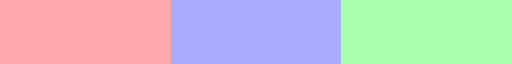

In [87]:
cmap_light = ListedColormap(["#FFAAAA", "#AAAAFF", "#AAFFAA"])
cmap_light

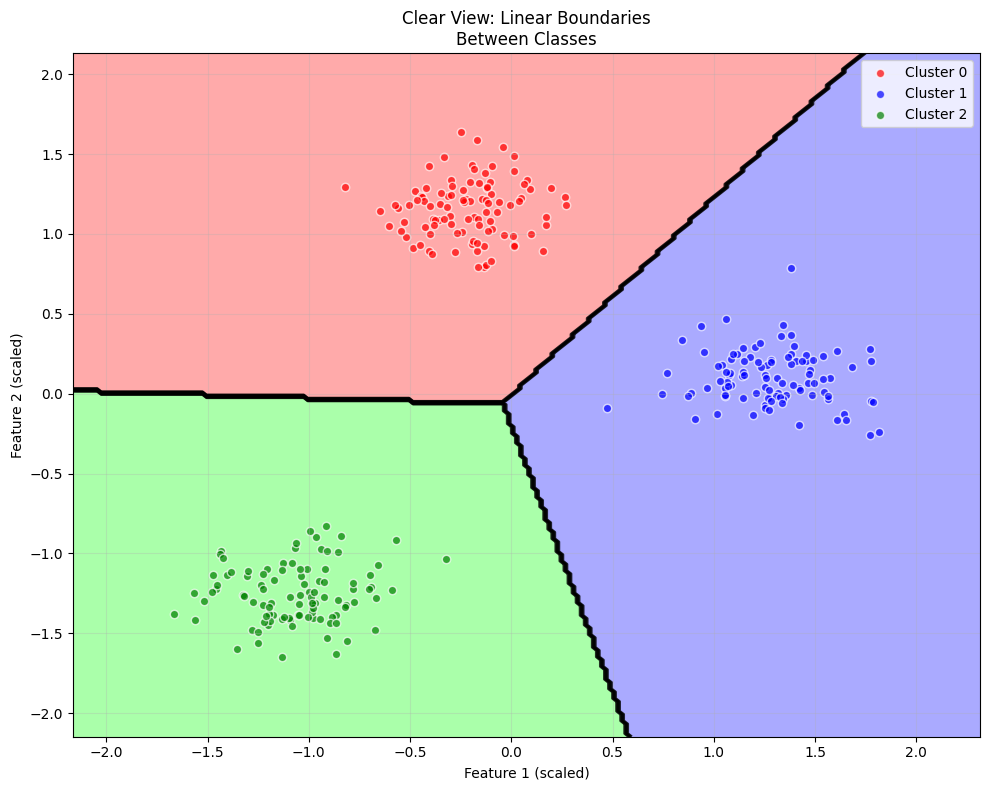

In [88]:
plt.figure(figsize=(10, 8))
# Plot decision boundaries as lines
plt.contour(xx, yy, Z, colors="black", linewidths=2, alpha=0.8)
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot data points
for i in range(3):
    plt.scatter(
        X_scaled[y == i, 0],
        X_scaled[y == i, 1],
        c=colors[i],
        label=f"Cluster {i}",
        alpha=0.7,
        edgecolors="w",
    )

plt.title("Clear View: Linear Boundaries\nBetween Classes")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

2) Gom code lại and add explain

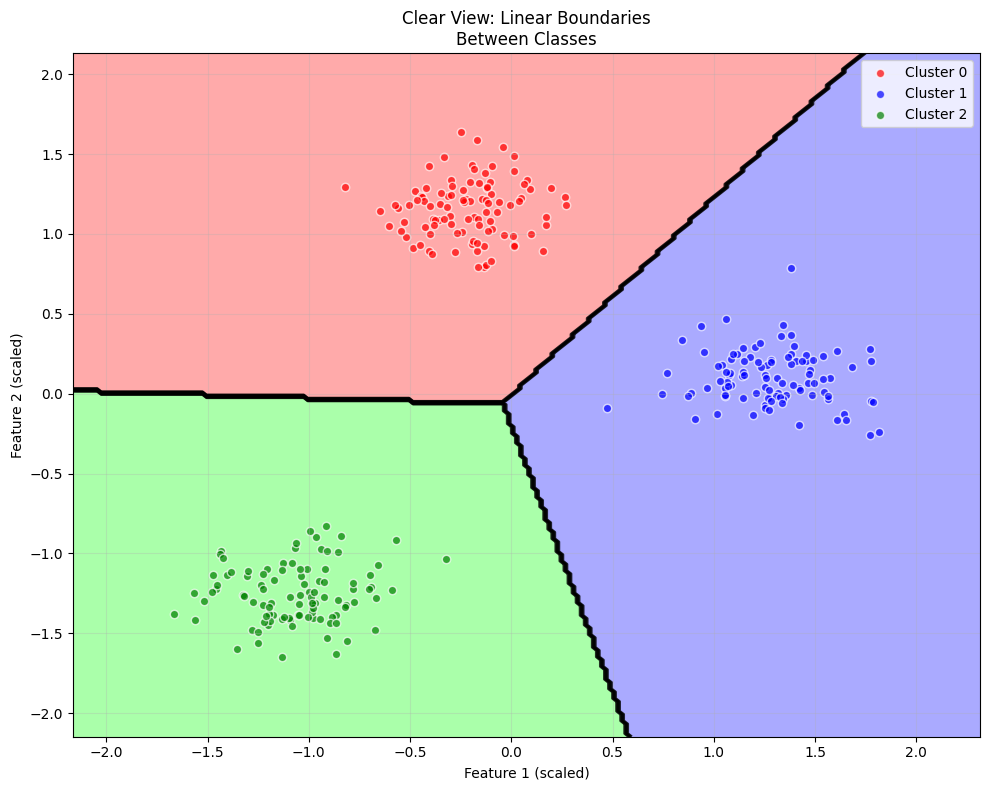

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap
# X_scaled, y, softmax_model, colors là các biến đã được định nghĩa trước

# --- 1. Tạo lưới tọa độ (Mesh Grid) cho vùng quyết định ---

# h: bước nhảy (step size) trong lưới tọa độ. Giá trị nhỏ hơn tạo ra lưới mịn hơn,
# nhưng làm tăng thời gian tính toán. 0.02 là giá trị phổ biến.
h = 0.02

# Tính toán phạm vi (min/max) cho trục x (Feature 1)
# Bắt đầu và kết thúc cách điểm dữ liệu nhỏ nhất/lớn nhất 0.5 đơn vị
# để đảm bảo vùng quyết định bao phủ toàn bộ dữ liệu.
x_min, x_max = X_scaled[:, 0].min() - 0.5, X_scaled[:, 0].max() + 0.5

# Tính toán phạm vi (min/max) cho trục y (Feature 2)
y_min, y_max = X_scaled[:, 1].min() - 0.5, X_scaled[:, 1].max() + 0.5

# Tạo lưới tọa độ (meshgrid) từ các phạm vi và bước nhảy đã tính.
# xx và yy là hai ma trận chứa tất cả các cặp tọa độ (x, y) trong lưới.
# Mỗi cặp tọa độ này sẽ được đưa vào mô hình để dự đoán.
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# --- 2. Dự đoán và định hình lại dữ liệu lưới ---

# np.c_[xx.ravel(), yy.ravel()]: 'làm phẳng' (ravel) xx và yy thành các mảng 1 chiều,
# sau đó kết hợp chúng thành một ma trận có 2 cột (Feature 1, Feature 2).
# Ma trận này chứa TẤT CẢ các điểm trên lưới.
# softmax_model.predict(...): Dùng mô hình đã huấn luyện để dự đoán nhãn cho từng điểm trong lưới.
Z = softmax_model.predict(np.c_[xx.ravel(), yy.ravel()])

# Z.reshape(xx.shape): Định hình lại kết quả dự đoán (Z) về lại hình dạng của lưới (xx/yy).
# Bây giờ Z là một ma trận, trong đó mỗi phần tử là nhãn dự đoán cho điểm tương ứng trong lưới.
Z = Z.reshape(xx.shape)

# --- 3. Cấu hình màu sắc và Vẽ biểu đồ ---

# ListedColormap: Tạo một bảng màu tùy chỉnh cho vùng quyết định.
# Các mã màu hex này đại diện cho 3 lớp (Class 0, 1, 2)
cmap_light = ListedColormap(["#FFAAAA", "#AAAAFF", "#AAFFAA"])

# Khởi tạo một hình (figure) và thiết lập kích thước.
plt.figure(figsize=(10, 8))

# plt.contour: Vẽ đường viền ranh giới quyết định.
# Nó vẽ các đường đồng mức (contour lines) dựa trên giá trị của Z.
# parameters:
#   xx, yy, Z: dữ liệu lưới.
#   colors='black': màu sắc của các đường viền.
#   linewidths=2: độ dày của đường viền.
#   alpha=0.8: độ trong suốt.
plt.contour(xx, yy, Z, colors="black", linewidths=2, alpha=0.8)

# plt.contourf: Tô màu cho vùng quyết định.
# Nó tạo ra các vùng được tô màu dựa trên nhãn dự đoán Z.
# parameters:
#   xx, yy, Z: dữ liệu lưới.
#   cmap=cmap_light: bảng màu được sử dụng để tô vùng.
plt.contourf(xx, yy, Z, cmap=cmap_light)

# --- 4. Vẽ các điểm dữ liệu thực tế ---

# Lặp qua từng lớp (giả định có 3 lớp: 0, 1, 2).
for i in range(3):
    # plt.scatter: Vẽ các điểm dữ liệu thực tế (đã được chia tỷ lệ).
    # parameters:
    #   X_scaled[y == i, 0]: Tọa độ x (Feature 1) của các điểm thuộc lớp i.
    #   X_scaled[y == i, 1]: Tọa độ y (Feature 2) của các điểm thuộc lớp i.
    #   c=colors[i]: Màu sắc cho lớp hiện tại (lấy từ mảng 'colors' đã định nghĩa trước).
    #   label=f'Cluster {i}': Nhãn hiển thị trong chú giải.
    #   alpha=0.7: Độ trong suốt của các điểm.
    #   edgecolors='w': Màu đường viền xung quanh mỗi điểm (màu trắng).
    plt.scatter(
        X_scaled[y == i, 0],
        X_scaled[y == i, 1],
        c=colors[i],
        label=f"Cluster {i}",
        alpha=0.7,
        edgecolors="w",
    )

# --- 5. Thêm tiêu đề, nhãn và chú giải ---

# Thiết lập tiêu đề biểu đồ.
plt.title("Clear View: Linear Boundaries\nBetween Classes")
# Thiết lập nhãn trục x.
plt.xlabel("Feature 1 (scaled)")
# Thiết lập nhãn trục y.
plt.ylabel("Feature 2 (scaled)")
# Hiển thị chú giải (Legend) dựa trên nhãn đã đặt trong plt.scatter.
plt.legend()
# Thêm lưới (grid) vào biểu đồ.
plt.grid(True, alpha=0.3)

# Điều chỉnh bố cục để biểu đồ vừa vặn, không bị cắt xén.
plt.tight_layout()
# Hiển thị biểu đồ.
plt.show()